In [ ]:
question 1:

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Simulating the penguins dataset with typical values for 'flipper_length_mm' and 'species'
data = {
    'species': ['Adelie'] * 50 + ['Chinstrap'] * 50 + ['Gentoo'] * 50,
    'flipper_length_mm': [190, 195, 180, 181, 186, 193, 185, 189, 191, 188] * 5 +
                         [195, 200, 202, 204, 198, 199, 201, 197, 203, 205] * 5 +
                         [210, 215, 220, 225, 218, 230, 233, 229, 222, 235] * 5
}

penguins = pd.DataFrame(data)

# Group by species and calculate statistics
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min_val='min',
    max_val='max'
).reset_index()

# Create a plotly histogram for each species
fig = px.histogram(penguins, x='flipper_length_mm', color='species', nbins=30, marginal='box')

# Add mean, median, and scale indicators (range, IQR, 2 std devs) for each species
for i, row in stats.iterrows():
    # Mean line
    fig.add_vline(x=row['mean'], line=dict(color='blue', width=2, dash='dash'),
                  annotation_text=f"{row['species']} Mean", annotation_position="top left")
    
    # Median line
    fig.add_vline(x=row['median'], line=dict(color='green', width=2, dash='dash'),
                  annotation_text=f"{row['species']} Median", annotation_position="top right")
    
    # Range rectangle
    fig.add_vrect(x0=row['min_val'], x1=row['max_val'], fillcolor="lightblue", opacity=0.2, line_width=0,
                  annotation_text=f"{row['species']} Range", annotation_position="bottom left")
    
    # IQR rectangle
    fig.add_vrect(x0=row['q1'], x1=row['q3'], fillcolor="lightgreen", opacity=0.2, line_width=0,
                  annotation_text=f"{row['species']} IQR", annotation_position="bottom right")
    
    # 2 standard deviations away from the mean
    fig.add_vrect(x0=row['mean'] - 2 * row['std'], x1=row['mean'] + 2 * row['std'], 
                  fillcolor="pink", opacity=0.2, line_width=0,
                  annotation_text=f"{row['species']} 2 Std Dev", annotation_position="top right")

# Show the plot
fig.show()

In [ ]:
question 2:

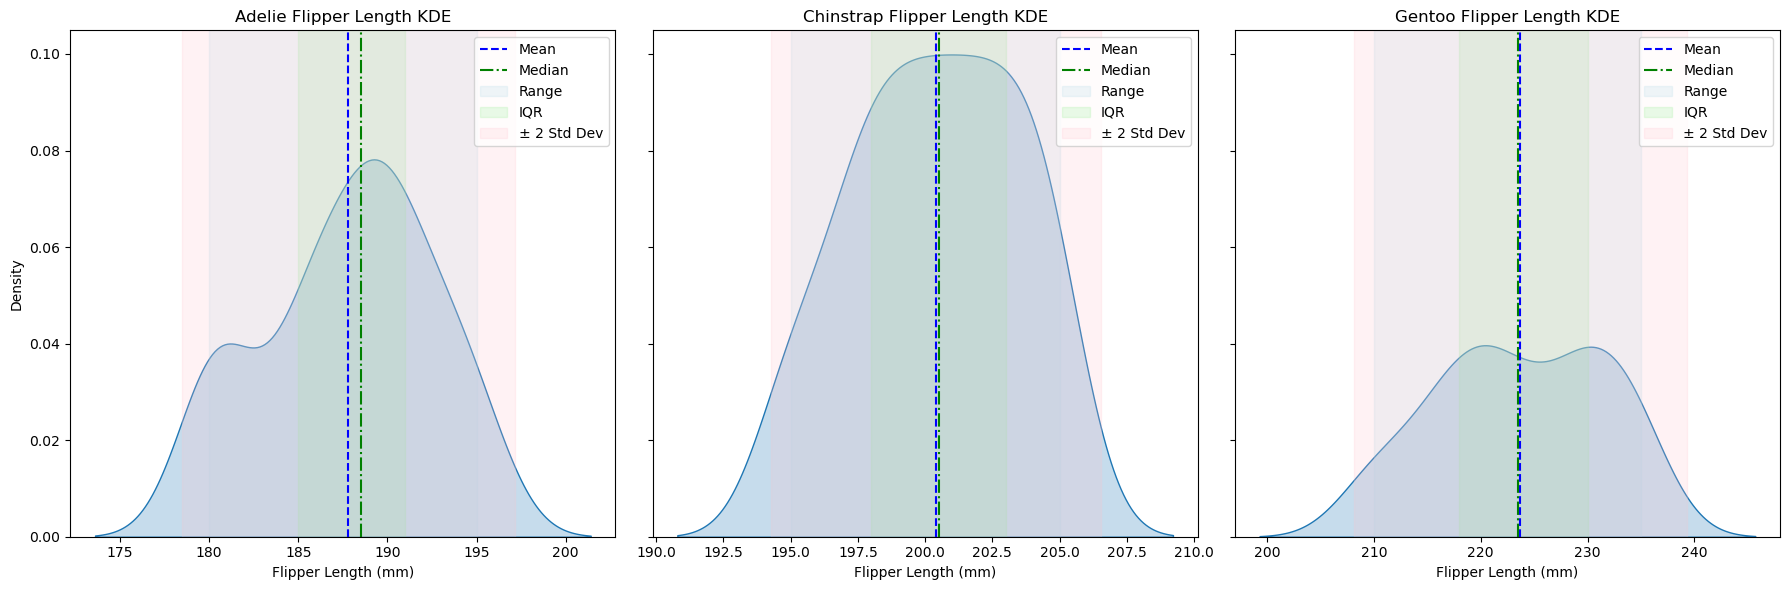

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate the penguins dataset with typical values for 'flipper_length_mm' and 'species'
data = {
    'species': ['Adelie'] * 50 + ['Chinstrap'] * 50 + ['Gentoo'] * 50,
    'flipper_length_mm': [190, 195, 180, 181, 186, 193, 185, 189, 191, 188] * 5 +
                         [195, 200, 202, 204, 198, 199, 201, 197, 203, 205] * 5 +
                         [210, 215, 220, 225, 218, 230, 233, 229, 222, 235] * 5
}

penguins = pd.DataFrame(data)

# Group by species and calculate statistics
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min_val='min',
    max_val='max'
).reset_index()

# Set up a row of three plots for the three species
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot KDEs and statistics for each species
for i, species in enumerate(stats['species']):
    subset = penguins[penguins['species'] == species]
    sns.kdeplot(subset['flipper_length_mm'], ax=axes[i], fill=True)
    
    # Add mean and median lines
    axes[i].axvline(x=stats.loc[i, 'mean'], color='blue', linestyle='--', label='Mean')
    axes[i].axvline(x=stats.loc[i, 'median'], color='green', linestyle='-.', label='Median')
    
    # Add range shaded area
    axes[i].axvspan(stats.loc[i, 'min_val'], stats.loc[i, 'max_val'], color='lightblue', alpha=0.2, label='Range')
    
    # Add IQR shaded area
    axes[i].axvspan(stats.loc[i, 'q1'], stats.loc[i, 'q3'], color='lightgreen', alpha=0.2, label='IQR')
    
    # Add 2 standard deviations from the mean shaded area
    axes[i].axvspan(stats.loc[i, 'mean'] - 2 * stats.loc[i, 'std'], stats.loc[i, 'mean'] + 2 * stats.loc[i, 'std'],
                    color='pink', alpha=0.2, label='± 2 Std Dev')
    
    # Set titles and labels
    axes[i].set_title(f"{species} Flipper Length KDE")
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Set a shared y-axis label
axes[0].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
question 3: I prefer KDEs because first, KDEs provide a smooth estimate of the data distribution, which can reveal underlying patterns more clearly than the discrete bins of a histogram.
Moreover, KDEs are non-parametric and can adapt to the shape of the data, making them versatile for different types of distributions.
Last but not least, unlike histograms, KDEs are not affected by the choice of bin edges, which can sometimes lead to misleading interpretations.

In [ ]:
question 4:

In [6]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
(1)data 1 and data 3 have similar means and variances.
(2)data 1, data 2 and data 3 have similar means but different variances, especially data 2 with a smaller variance than the other 2 datasets.
(3)None of the datasets have similar variances but quite different means.
(4)dataset 4 have quite different means and variances.

In [ ]:
chatbox session for question 1-4: https://chatgpt.com/share/66f6235c-5568-800c-a340-e35b35c0069a

In [ ]:
question 5:

In [8]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

In [ ]:
In right skewness, the mean is greater than the median due to the long tail of big values pulling the mean towards the right.
In left skewness, the median is greater than the mean, because the long tail of small values pull the mean towards the left.
However, the median is less affected by these extreme data, so the mean is greater than the median in right-skewed distribition but smaller than the median in left-skewed distribution.

In [ ]:
question 6:

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


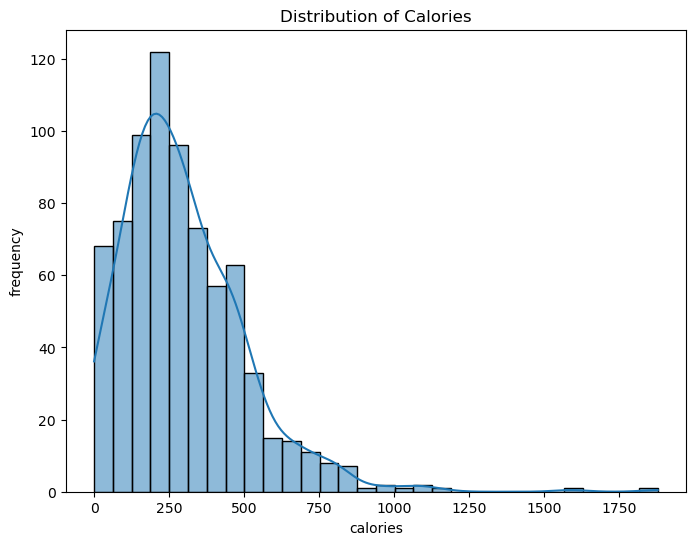

In [12]:
# Plot histogram of Calories
plt.figure(figsize=(8,6))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('calories')
plt.ylabel('frequency')
plt.show()

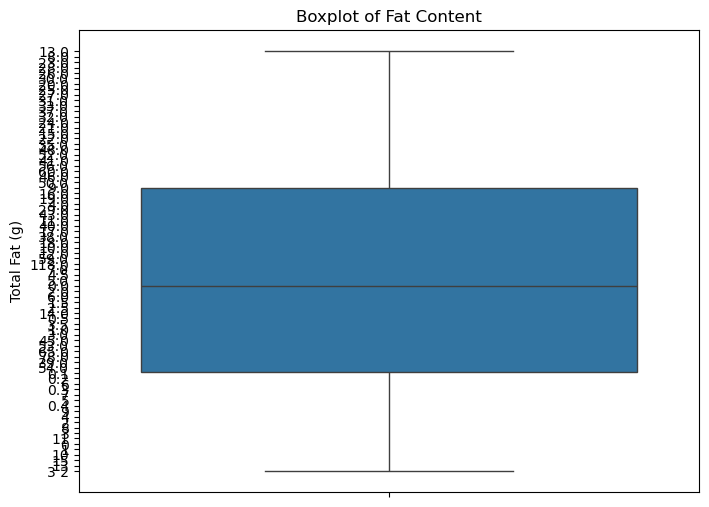

In [15]:
# Plot boxplot for Fat content
plt.figure(figsize=(8,6))
sns.boxplot(y='total fat (g)', data=df)
plt.title('Boxplot of Fat Content')
plt.ylabel('Total Fat (g)')
plt.show()

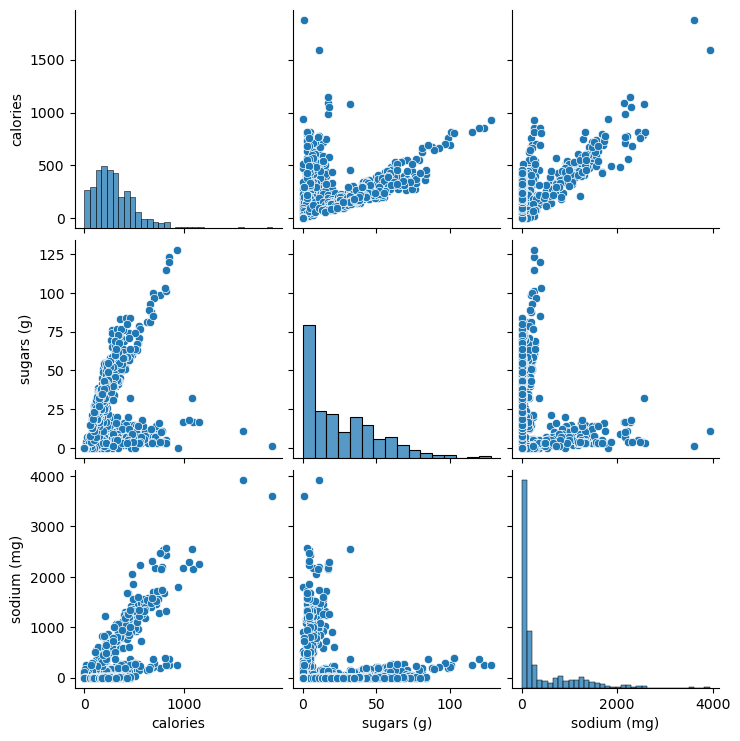

In [16]:
# Select relevant columns for pairplot
subset = df[['calories', 'total fat (g)', 'sugars (g)', 'sodium (mg)']]

# Pairplot
sns.pairplot(subset)
plt.show()

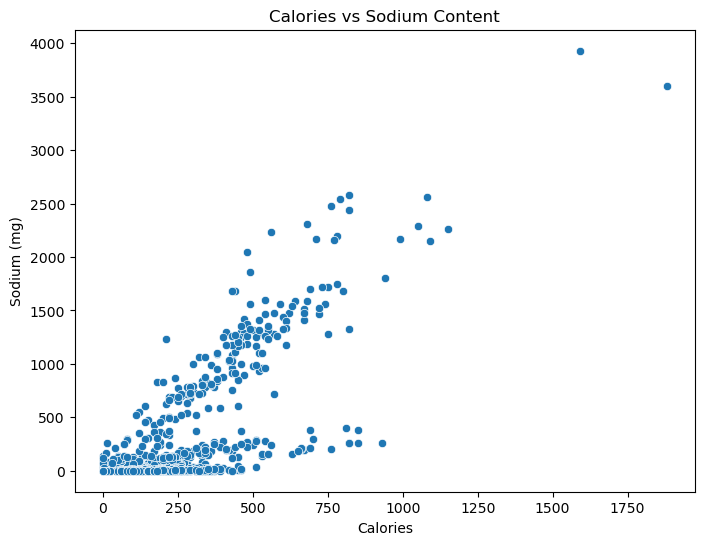

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='calories', y='sodium (mg)', data=df)
plt.title('Calories vs Sodium Content')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')
plt.show()

In [ ]:
question 8:

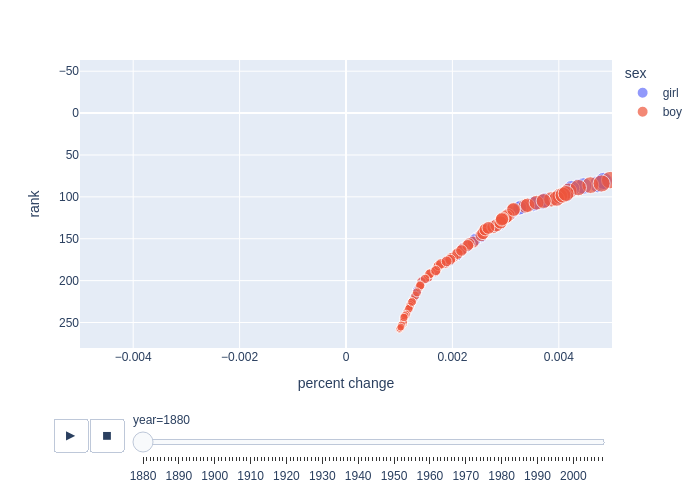

In [21]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank based on percent within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Calculate percent change in name prevalence
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort values by year and filter to common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]

# Create the scatter plot
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to put rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")  # Use this for GitHub or MarkUs submissions

In [ ]:
question 9: Yes.

In [ ]:
chatbox session for question 5-8: https://chatgpt.com/share/66f62931-52e8-800c-a04f-99e5811bba16